In [1]:
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

# Make project root importable
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [2]:
from src.model_training_edited import prepare_data, train_logistic_regression, train_random_forest
from src.evaluation_edited import evaluate_model, recall_at_k

In [3]:
processed_path = os.path.join(project_root, "data", "processed", "telco_churn_processed.csv")
df = pd.read_csv(processed_path)
print("df shape:", df.shape)

df shape: (7043, 28)


In [4]:
X_train, X_test, y_train, y_test, preprocessor = prepare_data(df)

In [5]:
X_train

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,charges_ratio,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,HighSpender,HighChurnRisk
3738,0,35,49.20,1701.65,34.586382,True,False,False,False,False,...,True,True,False,False,False,False,True,False,0,0
3151,0,15,75.10,1151.55,15.333555,True,True,True,True,False,...,False,False,False,False,False,False,False,True,1,0
4860,0,13,40.55,590.35,14.558570,True,True,True,False,False,...,False,False,False,True,False,False,False,True,0,0
3867,0,26,73.50,1905.70,25.927891,False,True,False,True,False,...,True,True,False,True,True,True,False,False,1,0
3810,0,1,44.55,44.55,1.000000,True,True,True,True,False,...,False,False,False,False,False,False,True,False,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6303,0,71,109.25,7707.70,70.551030,False,True,False,True,True,...,True,True,False,True,False,False,True,False,1,0
6227,0,2,46.05,80.35,1.744843,True,False,False,True,False,...,False,False,False,False,False,False,False,False,0,0
4673,1,25,102.80,2660.20,25.877432,False,False,False,True,True,...,True,True,False,False,True,False,False,True,1,0
2710,0,24,20.40,482.80,23.666667,False,True,False,True,False,...,False,False,True,False,False,True,False,False,0,0


In [6]:
log_model = train_logistic_regression(X_train, y_train, preprocessor)
rf_model  = train_random_forest(X_train, y_train, preprocessor)

In [9]:
log_model.feature_names_in_

array(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'charges_ratio', 'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'HighSpender', 'HighChurnRisk'], dtype=object)

In [6]:
log_results = evaluate_model(log_model, X_test, y_test)
rf_results  = evaluate_model(rf_model,  X_test, y_test)

print("Logistic accuracy:", log_results["accuracy"])
print("Random Forest accuracy:", rf_results["accuracy"])


Logistic accuracy: 0.7842441447835344
Random Forest accuracy: 0.7700496806245565


In [7]:
print(log_results["classification_report"] )

              precision    recall  f1-score   support

       False       0.82      0.91      0.86      1035
        True       0.63      0.45      0.53       374

    accuracy                           0.78      1409
   macro avg       0.73      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409



In [8]:
print(log_results["f1"])

0.525


In [9]:
#
print("log_model:", type(log_model))
print("rf_model :", type(rf_model))

print("log_results keys:", log_results.keys())
print("rf_results  keys:", rf_results.keys())

log_model: <class 'sklearn.pipeline.Pipeline'>
rf_model : <class 'sklearn.pipeline.Pipeline'>
log_results keys: dict_keys(['roc_auc', 'pr_auc', 'accuracy', 'precision', 'recall', 'f1', 'confusion_matrix', 'classification_report'])
rf_results  keys: dict_keys(['roc_auc', 'pr_auc', 'accuracy', 'precision', 'recall', 'f1', 'confusion_matrix', 'classification_report'])


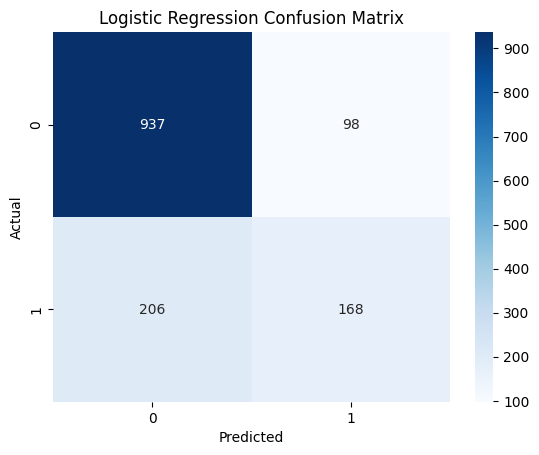

In [10]:
# Confusion matrix heatmap (Logistic Regression)
cm = log_results["confusion_matrix"]

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [11]:
# ROC curve comparison (use models directly for probabilities)
y_prob_log = log_model.predict_proba(X_test)[:, 1]
y_prob_rf  = rf_model.predict_proba(X_test)[:, 1]

In [12]:
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
roc_auc_log = auc(fpr_log, tpr_log)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)


In [13]:
rf_model.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('classifier', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transforme

In [33]:
# Fitted pipeline already includes the preprocessor and classifier
rf_model.fit(X_train, y_train)

# 2. Get fitted preprocessor
preprocessor_fitted = rf_model.named_steps["preprocessor"]

# 3. Get all feature names using get_feature_names_out
# This works for both numeric and categorical features in a ColumnTransformer
try:
    feature_names = preprocessor_fitted.get_feature_names_out()
except:
    # fallback: combine numeric + categorical manually
    num_features = preprocessor_fitted.transformers_[0][2]
    cat_pipeline = preprocessor_fitted.transformers_[1][1]
    cat_encoder = cat_pipeline.named_steps["encoder"]
    cat_features = cat_encoder.get_feature_names_out(cat_pipeline.feature_names_in_)
    feature_names = list(num_features) + list(cat_features)




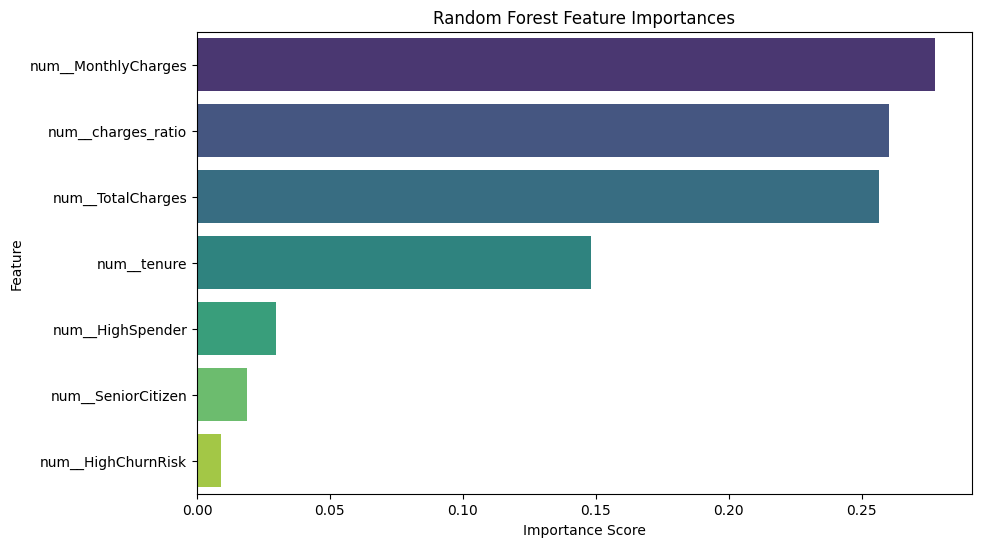

In [34]:

importances = rf_model.named_steps["classifier"].feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(
    x=importances[indices],
    y=[feature_names[i] for i in indices],
    hue=[feature_names[i] for i in indices],  # assign y to hue
    palette="viridis",
    dodge=False,   # keep bars together
    legend=False   # remove legend
)
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


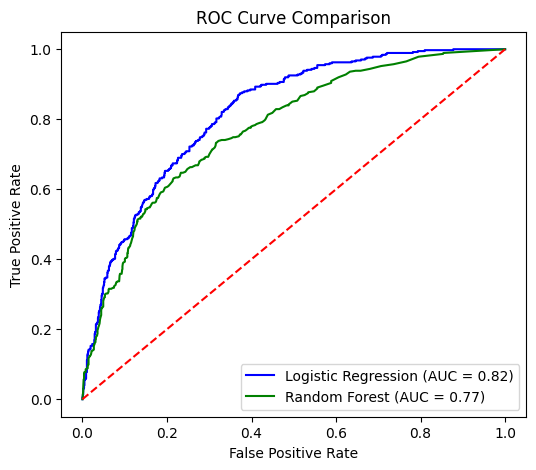

In [16]:
# ROC curves
plt.figure(figsize=(6, 5))
plt.plot(fpr_log, tpr_log, color="blue",  label=f"Logistic Regression (AUC = {roc_auc_log:.2f})")
plt.plot(fpr_rf,  tpr_rf,  color="green", label=f"Random Forest (AUC = {roc_auc_rf:.2f})")
plt.plot([0, 1], [0, 1], "r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


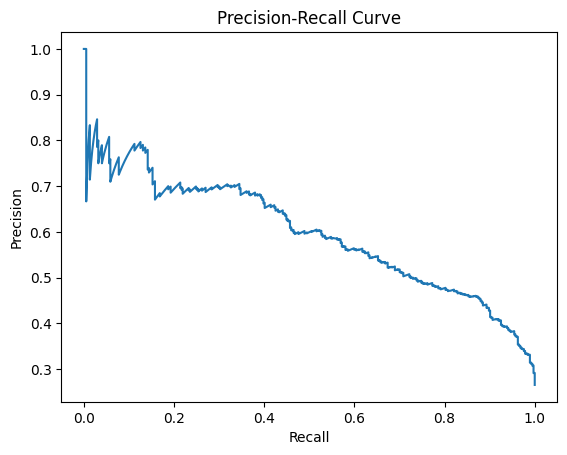

In [17]:
from sklearn.metrics import precision_recall_curve

def plot_pr(y_true, y_prob):
    precision, recall, _ = precision_recall_curve(y_true, y_prob)

    plt.figure()
    plt.plot(recall, precision)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.show()
    
plot_pr(y_test, y_prob_log)


In [18]:
precision, recall, thresholds = precision_recall_curve(y_test, y_prob_log)

In [19]:
print("Precision-Recall thresholds:", thresholds)

Precision-Recall thresholds: [0.00338908 0.00375316 0.00389768 ... 0.83454916 0.83741942 0.86399264]


In [20]:
print("Precision:", precision)
print("Recall:", recall)

Precision: [0.26543648 0.265625   0.26581379 ... 1.         1.         1.        ]
Recall: [1.         1.         1.         ... 0.00534759 0.0026738  0.        ]


In [21]:
print(thresholds[1]) # → gives you the cutoff

print(precision[1])
print(recall[1]) # → what happens at that cutoff

0.0037531631317332674
0.265625
1.0


In [22]:
precision_adj = precision[:-1]
recall_adj = recall[:-1]

mask = (recall_adj >= 0.5) & (precision_adj >= 0.6)

optimal_threshold = thresholds[mask][0]


In [23]:
recall_20_log = recall_at_k(y_test, y_prob_log, k=0.2)
print("Logistic Regression Recall at 20%:", recall_20_log)


Logistic Regression Recall at 20%: 0.4572192513368984


In [24]:
recall_20_rf = recall_at_k(y_test, y_prob_rf, k=0.2)
print("Random Forest Recall at 20%:", recall_20_rf)

Random Forest Recall at 20%: 0.4385026737967914


In [32]:
# LIFT METRIC CALCULATION

import numpy as np


def lift_at_k(y_true, y_prob, k=0.2):
    """Return (precision_at_k, baseline_rate, lift_at_k) for top-k ranked customers."""
    y_true = np.asarray(y_true)
    y_prob = np.asarray(y_prob)

    n = y_true.shape[0]
    k_n = max(1, int(np.ceil(k * n)))

    top_idx = np.argsort(y_prob)[::-1][:k_n]

    precision_k = y_true[top_idx].mean()  
    baseline = y_true.mean()  
    lift = precision_k / baseline if baseline > 0 else np.nan

    return precision_k, baseline, lift


for k in [0.10, 0.20]:
    p_log, base, lift_log = lift_at_k(y_test, y_prob_log, k=k)
    p_rf, base, lift_rf = lift_at_k(y_test, y_prob_rf, k=k)

    print(
        f"\n--- Lift@{int(k * 100)}% (Top {int(k * 100)}% highest-risk customers) ---"
    )
    print(f"Baseline churn rate (random): {base:.3f}")
    print(
        f"Logistic: Precision@{int(k * 100)}% = {p_log:.3f}  | Lift = {lift_log:.2f}x"
    )
    print(f"RF      : Precision@{int(k * 100)}% = {p_rf:.3f}  | Lift = {lift_rf:.2f}x")



--- Lift@10% (Top 10% highest-risk customers) ---
Baseline churn rate (random): 0.265
Logistic: Precision@10% = 0.695  | Lift = 2.62x
RF      : Precision@10% = 0.674  | Lift = 2.54x

--- Lift@20% (Top 20% highest-risk customers) ---
Baseline churn rate (random): 0.265
Logistic: Precision@20% = 0.610  | Lift = 2.30x
RF      : Precision@20% = 0.585  | Lift = 2.20x


**SHAP Explainability for Logistic Regression and Random Forest models**


In [ ]:
import shap
import numpy as np
import scipy.sparse as sp


def func_split_pipeline(pipeline):
    """Return (preprocessor, estimator) from a sklearn Pipeline-like object."""
    if hasattr(pipeline, "named_steps") and hasattr(pipeline, "steps"):
        steps = pipeline.named_steps

        pre = steps.get("preprocessor", None)

        if pre is None:
            for name, step in pipeline.steps[:-1]:
                if hasattr(step, "transform"):
                    pre = step
                    break

        est = pipeline.steps[-1][1]
        return pre, est

    return None, pipeline


def func_get_feature_names(pre, X):
    """Best-effort feature name recovery after preprocessing."""
    if pre is not None and hasattr(pre, "get_feature_names_out"):
        try:
            return np.array(pre.get_feature_names_out(), dtype=str)
        except Exception:
            pass

    if hasattr(X, "columns"):
        return np.array(X.columns, dtype=str)

    return None


def func_transform(pre, X):
    """Apply preprocessor transform if present; otherwise return X."""
    if pre is None:
        return X
    return pre.transform(X)


def func_sample_rows(X, n=2000, random_state=42):
    """Sample rows from DataFrame / ndarray / sparse matrix."""
    n = min(n, X.shape[0])

    if hasattr(X, "sample"):
        Xs = X.sample(n=n, random_state=random_state)
        idx = Xs.index
        return Xs, idx

    rng = np.random.RandomState(random_state)
    idx = rng.choice(np.arange(X.shape[0]), size=n, replace=False)
    return X[idx], idx


def func_align_y(y, idx):
    """Align y to sampled indices (works for pandas Series or numpy arrays)."""
    if hasattr(y, "loc"):
        return y.loc[idx]
    return y[idx]


def func_select_positive_class(shap_exp):
    """
    Ensure we explain the positive class (class=1) for classification outputs.
    Some SHAP versions return (n_samples, n_features, n_classes).
    """
    if hasattr(shap_exp, "values") and getattr(shap_exp.values, "ndim", 0) == 3:
        return shap_exp[..., 1]
    return shap_exp



Logistic SHAP shape: (1409, 7)


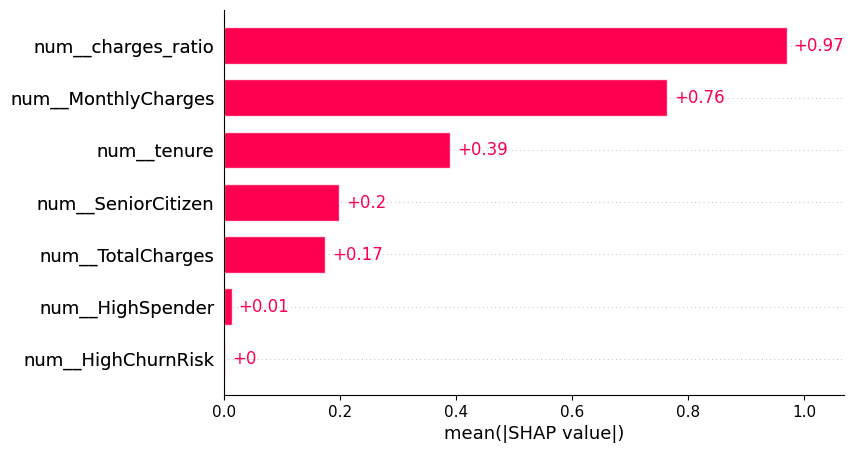

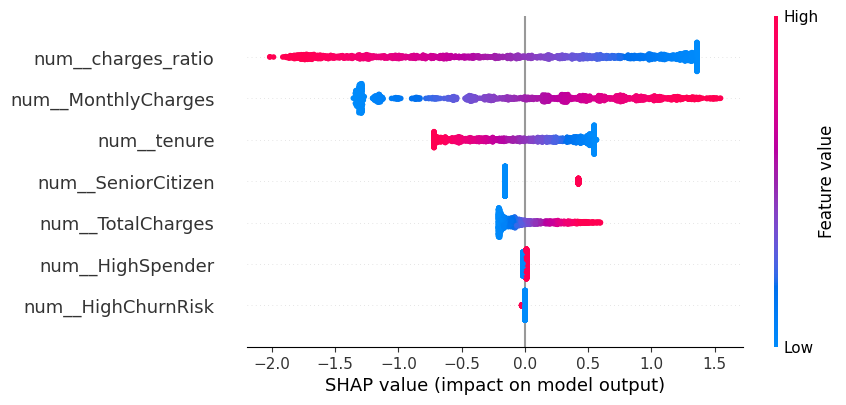

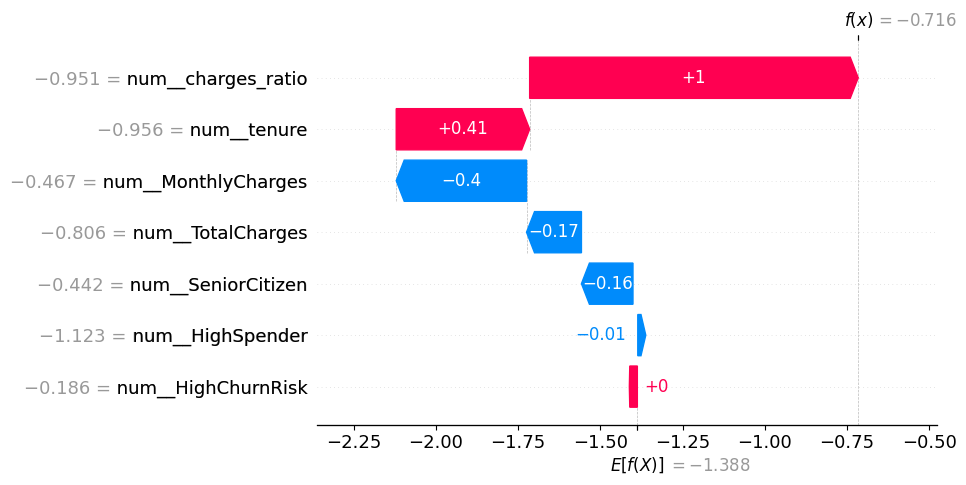

In [26]:

# For LOGISTIC REGRESSION

pre_log, est_log = func_split_pipeline(log_model)
if "preprocessor" in globals() and preprocessor is not None:
    pre_log = preprocessor

X_test_s, idx_s = func_sample_rows(X_test, n=2000, random_state=42)
y_test_s = func_align_y(y_test, idx_s)

X_train_t = func_transform(pre_log, X_train)
X_test_t  = func_transform(pre_log, X_test_s)

feature_names = func_get_feature_names(pre_log, X_train)

try:
    background = shap.utils.sample(X_train_t, 200, random_state=42)
except Exception:
    background = X_train_t

explainer_log = shap.Explainer(est_log, background, feature_names=feature_names)

shap_values_log = explainer_log(X_test_t)
shap_values_log = func_select_positive_class(shap_values_log)

print("Logistic SHAP shape:", shap_values_log.values.shape)

try:
    shap.plots.bar(shap_values_log, max_display=20)
    shap.plots.beeswarm(shap_values_log, max_display=20)
except Exception:
    X_plot = X_test_t.toarray() if (sp is not None and sp.issparse(X_test_t)) else X_test_t
    shap.summary_plot(shap_values_log.values, X_plot, feature_names=feature_names, max_display=20)

try:
    shap.plots.waterfall(shap_values_log[0], max_display=20)
except Exception:
    pass


100%|===================| 2808/2818 [04:20<00:00]        

✅ RF SHAP values (positive class) shape: (1409, 7)


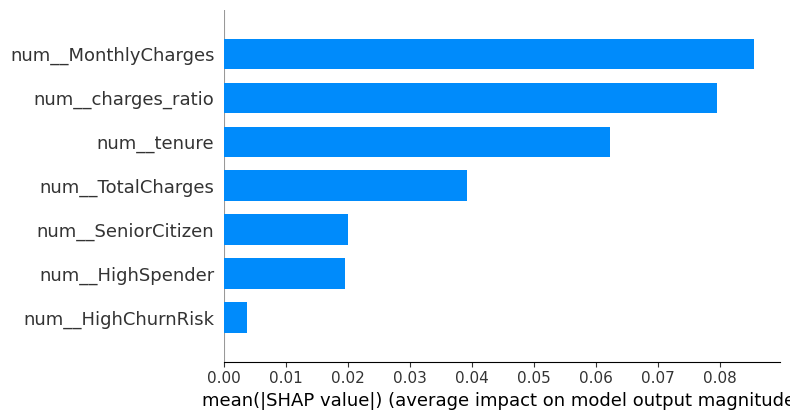

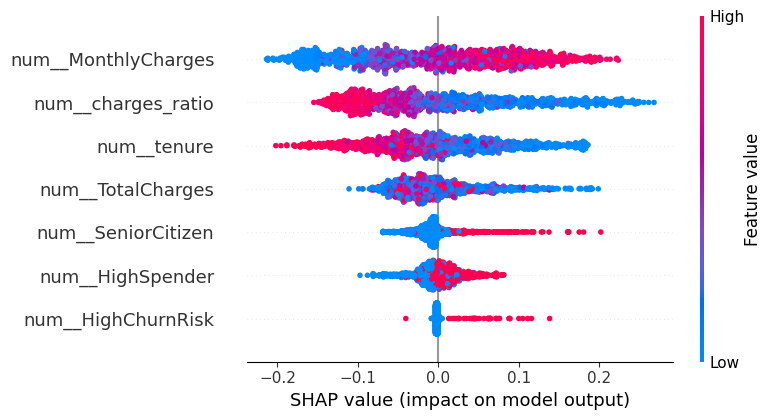

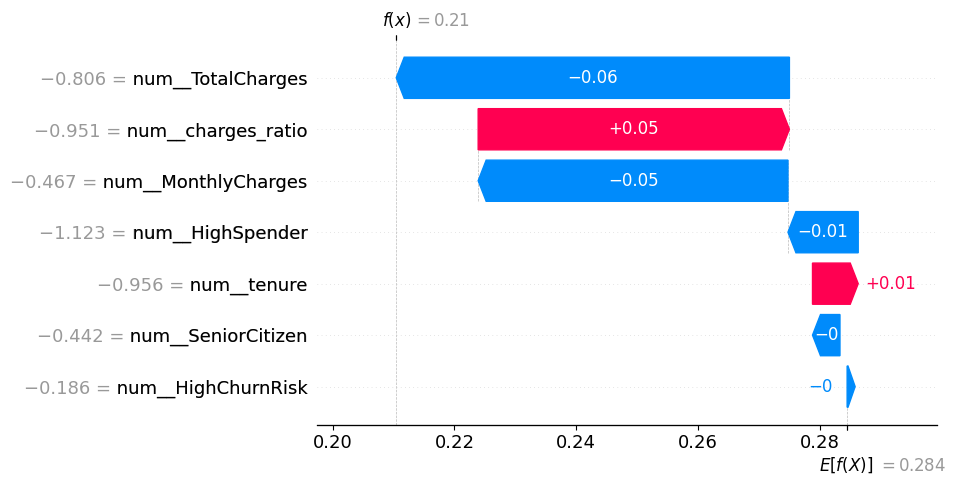

In [28]:
#RANDOM FOREST

import numpy as np

pre_rf, est_rf = func_split_pipeline(rf_model)

X_test_s, idx_s = func_sample_rows(X_test, n=2000, random_state=42)
y_test_s = func_align_y(y_test, idx_s)

X_train_t = func_transform(pre_rf, X_train)
X_test_t = func_transform(pre_rf, X_test_s)

feature_names = func_get_feature_names(pre_rf, X_train)

def _to_dense(X):
    if sp is not None and sp.issparse(X):
        return X.toarray()
    return X


X_train_bg = X_train_t
try:
    bg_idx = np.random.RandomState(42).choice(
        X_train_bg.shape[0], size=min(200, X_train_bg.shape[0]), replace=False
    )
    background = _to_dense(X_train_bg[bg_idx])
except Exception:
    background = _to_dense(X_train_bg)

X_test_dense = _to_dense(X_test_t)

try:
    explainer_rf = shap.TreeExplainer(
        est_rf, data=background, feature_names=feature_names, model_output="probability"
    )
except TypeError:
    explainer_rf = shap.TreeExplainer(
        est_rf, data=background, feature_names=feature_names
    )

shap_vals = explainer_rf.shap_values(X_test_dense)

if isinstance(shap_vals, list):
    shap_vals_pos = shap_vals[1]  # class 1
    base_val = (
        explainer_rf.expected_value[1]
        if isinstance(explainer_rf.expected_value, (list, np.ndarray))
        else explainer_rf.expected_value
    )
elif hasattr(shap_vals, "ndim") and shap_vals.ndim == 3:
    shap_vals_pos = shap_vals[:, :, 1]
    base_val = (
        explainer_rf.expected_value[1]
        if isinstance(explainer_rf.expected_value, (list, np.ndarray))
        else explainer_rf.expected_value
    )
else:
    shap_vals_pos = shap_vals
    base_val = explainer_rf.expected_value


if np.isscalar(base_val):
    base_values_rf = np.full(X_test_dense.shape[0], base_val)
else:
    base_values_rf = base_val

shap_values_rf = shap.Explanation(
    values=shap_vals_pos,
    base_values=base_values_rf,
    data=X_test_dense,
    feature_names=feature_names,
)

shap.summary_plot(
    shap_vals_pos,
    X_test_dense,
    feature_names=feature_names,
    plot_type="bar",
    max_display=20,
)

shap.summary_plot(
    shap_vals_pos, X_test_dense, feature_names=feature_names, max_display=20
)

try:
    exp0 = shap.Explanation(
        values=shap_vals_pos[0],
        base_values=base_val,
        data=X_test_dense[0],
        feature_names=feature_names,
    )
    shap.plots.waterfall(exp0, max_display=20)
except Exception as e:
    print("Waterfall plot skipped due to:", repr(e))


Comparing the output of SHAP for Logistic Regression vs Random Forest

In [31]:
def cal_mean_abs_shap(shap_exp):
    vals = shap_exp.values
    return np.mean(np.abs(vals), axis=0)

log_importance = cal_mean_abs_shap(shap_values_log)
rf_importance  = cal_mean_abs_shap(shap_values_rf)

if feature_names is None:
    feature_names = np.array([f"feature_{i}" for i in range(len(log_importance))])

top_n = 15
top_log_idx = np.argsort(log_importance)[::-1][:top_n]
top_rf_idx  = np.argsort(rf_importance)[::-1][:top_n]

print("Top features (Logistic Regression):")
for i in top_log_idx:
    print(f"  {feature_names[i]}: {log_importance[i]:.4f}")

print("\nTop features (Random Forest):")
for i in top_rf_idx:
    print(f"  {feature_names[i]}: {rf_importance[i]:.4f}")


Top features (Logistic Regression):
  num__charges_ratio: 0.9701
  num__MonthlyCharges: 0.7642
  num__tenure: 0.3899
  num__SeniorCitizen: 0.1987
  num__TotalCharges: 0.1745
  num__HighSpender: 0.0134
  num__HighChurnRisk: 0.0021

Top features (Random Forest):
  num__MonthlyCharges: 0.0854
  num__charges_ratio: 0.0796
  num__tenure: 0.0623
  num__TotalCharges: 0.0393
  num__SeniorCitizen: 0.0200
  num__HighSpender: 0.0195
  num__HighChurnRisk: 0.0037
